In [13]:
import pandas as pd
import numpy as np
import numpy as np
import mglearn
from matplotlib import rc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from lightgbm import LGBMRegressor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 나눔 폰트를 사용합니다.
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
Sample = pd.read_excel('221021_Pistachio_28_Features_Dataset.xlsx')

left = ['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Class']

Sample = Sample.loc[:, left]
Sample

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,Kirmizi_Pistachio
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,Kirmizi_Pistachio
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,Kirmizi_Pistachio
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,Kirmizi_Pistachio
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,0.8070,0.7446,Siirt_Pistachio
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,0.1988,0.7509,Siirt_Pistachio
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,0.8061,0.7551,Siirt_Pistachio
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,0.8569,0.7788,Siirt_Pistachio


In [3]:
# Sample.info()

def encoder(series):
    dic = dict(zip(series.unique(), range(len(series.unique()))))
    result = series.apply(lambda x : dic[x])
    return result

Sample["Class"] = encoder(Sample["Class"])
        
Sample.corrwith(Sample['Class'])

Area            0.589226
Perimeter       0.145290
Major_Axis      0.136845
Minor_Axis      0.668126
Eccentricity   -0.546759
Eqdiasq         0.577300
Solidity        0.125347
Convex_Area     0.584618
Extent          0.100200
Aspect_Ratio   -0.581469
Roundness       0.105768
Compactness     0.624939
Class           1.000000
dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_22200\2650673030.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(Sample.corr(), dtype=np.bool)


<AxesSubplot:>

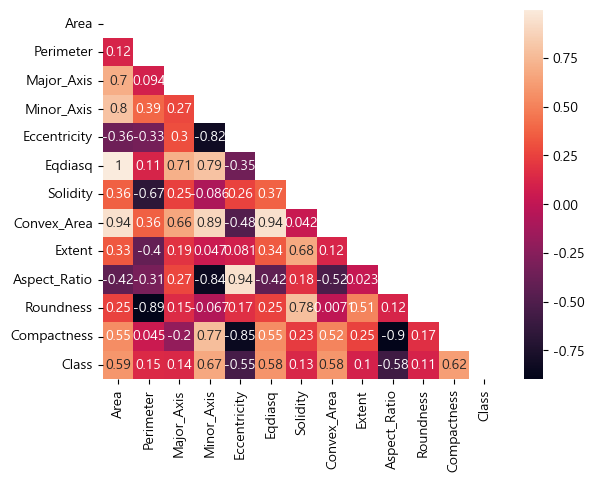

In [4]:
import seaborn as sns

mask = np.zeros_like(Sample.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(Sample.corr(), annot=True, mask=mask)

C:\Users\user\AppData\Local\Temp\ipykernel_22200\1901202278.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(Sample.corr(), dtype=np.bool)


<AxesSubplot:>

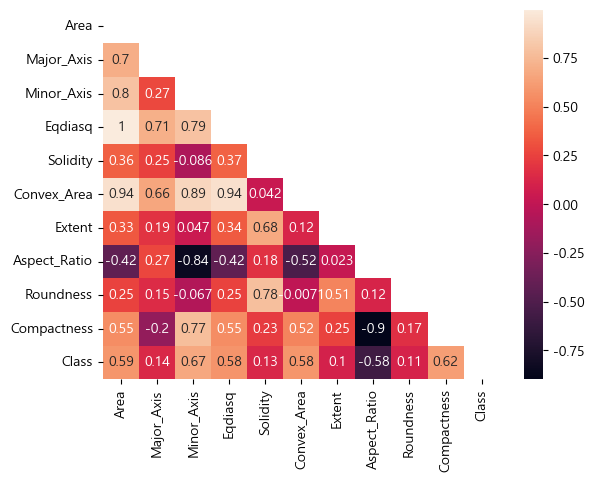

In [5]:
Sample.drop(columns=['Perimeter', 'Eccentricity'], inplace=True)
# Sample.drop(columns=['Aspect_Ratio', 'Eccentricity', 'Solidity', 'Perimeter'], inplace=True)

import seaborn as sns

mask = np.zeros_like(Sample.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(Sample.corr(), annot=True, mask=mask)

C:\Users\user\AppData\Local\Temp\ipykernel_22200\2071821248.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(Sample.corr(), dtype=np.bool)


<AxesSubplot:>

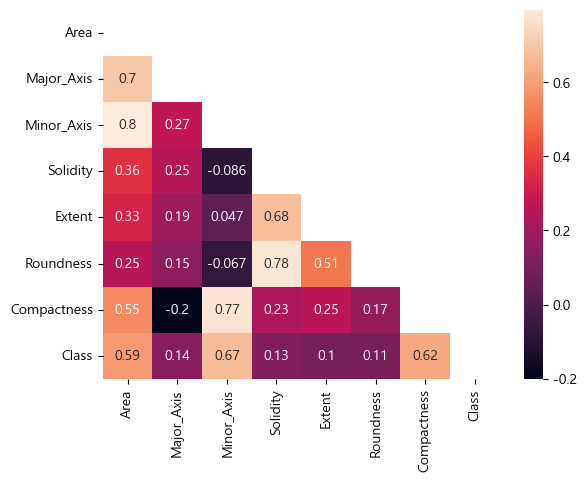

In [7]:
Sample.drop(columns=['Aspect_Ratio', 'Convex_Area', 'Eqdiasq'], inplace=True)

import seaborn as sns

mask = np.zeros_like(Sample.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(Sample.corr(), annot=True, mask=mask)

C:\Users\user\AppData\Local\Temp\ipykernel_22200\3930737030.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(Sample.corr(), dtype=np.bool)


<AxesSubplot:>

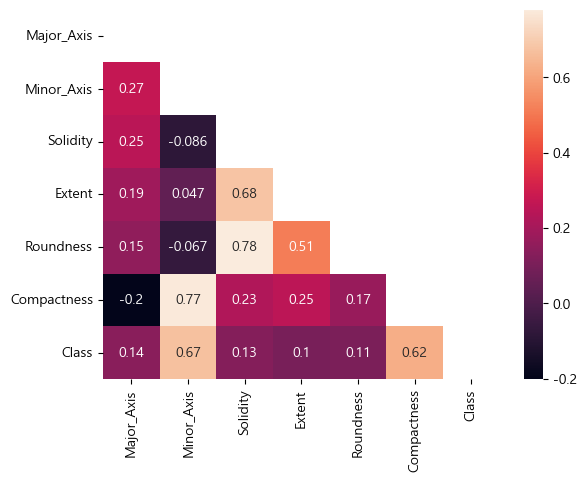

In [8]:
Sample.drop(columns=['Area'], inplace=True)

import seaborn as sns

mask = np.zeros_like(Sample.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(Sample.corr(), annot=True, mask=mask)

C:\Users\user\AppData\Local\Temp\ipykernel_22200\2043766961.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(Sample.corr(), dtype=np.bool)


<AxesSubplot:>

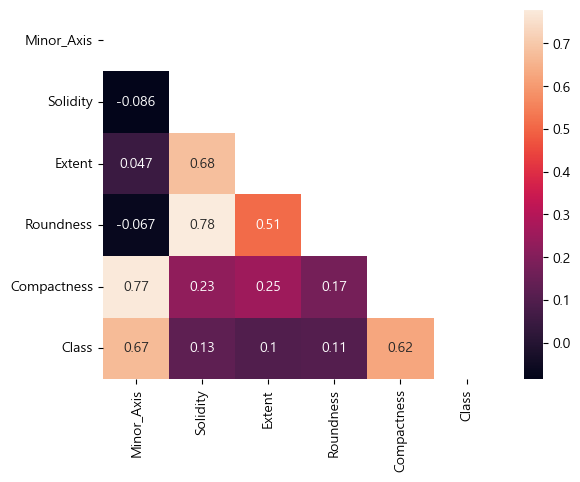

In [9]:
Sample.drop(columns=['Major_Axis'], inplace=True)

import seaborn as sns

mask = np.zeros_like(Sample.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(Sample.corr(), annot=True, mask=mask)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

from sklearn.metrics import r2_score


In [20]:
X_train, X_test, y_train, y_test = train_test_split(Sample[['Minor_Axis', 'Solidity', 'Extent', 'Roundness', 'Compactness']], Sample["Class"])

model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()
model4 = RandomForestClassifier()
model5 = GradientBoostingClassifier()
model6 = xgb.XGBClassifier()
model7 = LGBMClassifier()

model1.fit(X_train,  y_train)
model2.fit(X_train,  y_train)
model3.fit(X_train,  y_train)
model4.fit(X_train,  y_train)
model5.fit(X_train,  y_train)
model6.fit(X_train,  y_train)
model7.fit(X_train,  y_train)

predict1 = model1.predict(X_train)
predict2 = model2.predict(X_train)
predict3 = model3.predict(X_train)
predict4 = model4.predict(X_train)
predict5 = model5.predict(X_train)
predict6 = model6.predict(X_train)
predict7 = model7.predict(X_train)

predict_avg = np.round((predict1 + predict2 + predict3 + predict4 + predict5 + predict6 + predict7)/7)

c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
score = 0
for a, i in enumerate(predict_avg):
    if y_train.reset_index(drop = True)[a] == i:
        score += 1
    else:
        pass
score/len(y_train)



0.9993792675356921

<BarContainer object of 8 artists>

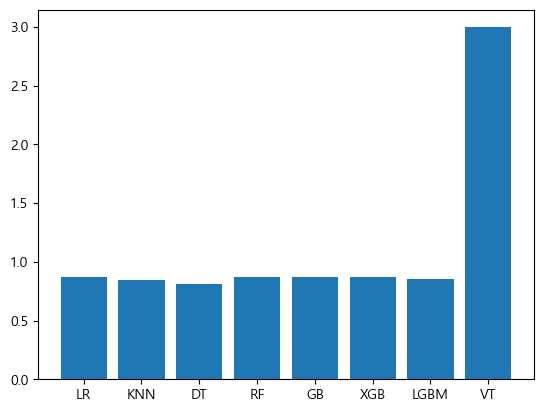

In [25]:

model_name = ["LR", "KNN", "DT", "RF", "GB", "XGB", "LGBM", "VT"]
scores2 = [model1.score(X_test, y_test), model2.score(X_test, y_test),
           model3.score(X_test, y_test), model4.score(X_test, y_test),
           model5.score(X_test, y_test), model6.score(X_test, y_test),
           model7.score(X_test, y_test), score/len(y_test)]

plt.bar(model_name, scores2)

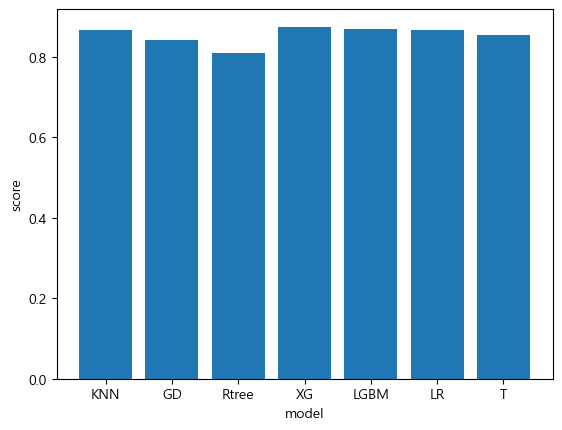

In [22]:
#test
models = ["KNN","GD","Rtree","XG","LGBM","LR","T"]
scr = [model1.score(X_test,y_test),model2.score(X_test,y_test), model3.score(X_test,y_test), 
       model4.score(X_test,y_test), model5.score(X_test,y_test), model6.score(X_test,y_test), model7.score(X_test,y_test)]

plt.bar(models,scr)
plt.xlabel("model")
plt.ylabel("score")
plt.show()

#train